In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2025-01-16 22:19:08.987481: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-16 22:19:09.105699: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-16 22:19:09.186401: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737076749.258406   16121 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737076749.274177   16121 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-16 22:19:09.412366: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

### Data Preparation

In [58]:
train = '../../data/processed/train.csv'
test = '../../data/processed/test.csv'

X, y = pd.read_csv(train), pd.read_csv(test)

In [59]:
X

,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,rentEstimate_lowerPrice,rentEstimate_currentPrice,rentEstimate_upperPrice,saleEstimate_lowerPrice,saleEstimate_currentPrice,saleEstimate_upperPrice,saleEstimate_valueChange.numericChange,history_numericChange
0,51.511881,-0.073471,1.0,1.0,54.0,1.0,2150.0,2300.0,2450.0,447000.0,496000.0,546000.0,46000.0,NaN
1,51.517972,-0.078028,2.0,2.0,73.0,1.0,2800.0,3000.0,3250.0,619000.0,651000.0,684000.0,28000.0,23000.0
2,51.517972,-0.078028,2.0,2.0,73.0,1.0,2800.0,3000.0,3250.0,619000.0,651000.0,684000.0,28000.0,365000.0
3,51.517972,-0.078028,2.0,2.0,73.0,1.0,2800.0,3000.0,3250.0,619000.0,651000.0,684000.0,28000.0,151500.0
4,51.517972,-0.078028,2.0,2.0,73.0,1.0,2800.0,3000.0,3250.0,619000.0,651000.0,684000.0,28000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254601,51.512331,-0.113934,2.0,2.0,105.0,1.0,7850.0,8650.0,9450.0,2020000.0,2126000.0,2232000.0,456000.0,NaN
254602,51.512331,-0.113934,2.0,2.0,104.0,1.0,7850.0,8650.0,9450.0,1915000.0,2128000.0,2341000.0,578000.0,NaN
254603,51.512331,-0.113934,NaN,NaN,68.0,NaN,5500.0,6050.0,6650.0,1195000.0,1493000.0,1792000.0,383000.0,NaN
254604,51.512331,-0.113934,NaN,NaN,104.0,NaN,7300.0,8050.0,8800.0,1583000.0,1979000.0,2375000.0,299000.0,NaN


In [61]:
X.columns

Index(['latitude', 'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM',
       'livingRooms', 'rentEstimate_lowerPrice', 'rentEstimate_currentPrice',
       'rentEstimate_upperPrice', 'saleEstimate_lowerPrice',
       'saleEstimate_currentPrice', 'saleEstimate_upperPrice',
       'saleEstimate_valueChange.numericChange', 'history_numericChange'],
      dtype='object')

In [62]:
X = X.drop(columns=['saleEstimate_valueChange.numericChange',
                'history_numericChange',
                ])

In [63]:
y

,history_price
0,450000
1,623000
2,600000
3,235000
4,83500
...,...
254601,1670000
254602,1550000
254603,1110000
254604,1680000


In [64]:
print('X (shape): ', X.shape)
print('y (shape): ', y.shape)

X (shape):  (254606, 12)
y (shape):  (254606, 1)


<Axes: ylabel='Frequency'>

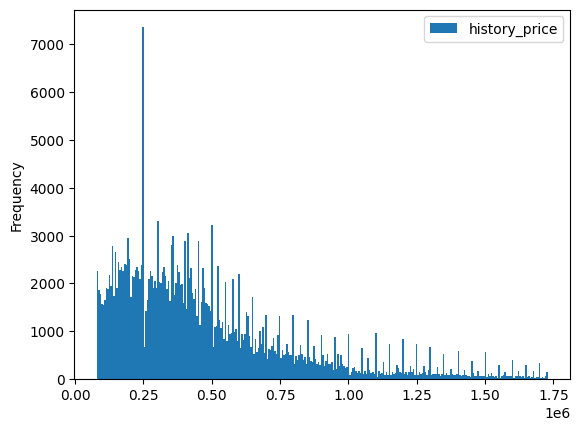

In [65]:
y.plot(kind='hist', bins=300)

In [66]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [67]:
print(X_train.shape)
print(X_valid.shape)


(203684, 12)
(50922, 12)


In [68]:
print('X_train is Nan?\n', np.isnan(X_train).any())
print('\n\ny_train is Nan?\n', np.isnan(y_train).any())

X_train is Nan?
 latitude                     False
longitude                    False
bathrooms                     True
bedrooms                      True
floorAreaSqM                  True
livingRooms                   True
rentEstimate_lowerPrice       True
rentEstimate_currentPrice     True
rentEstimate_upperPrice       True
saleEstimate_lowerPrice       True
saleEstimate_currentPrice     True
saleEstimate_upperPrice       True
dtype: bool


y_train is Nan?
 history_price    False
dtype: bool


In [69]:
print('X_train is Nan?\n', np.isinf(X_train).any())
print('\n\ny_train is Nan?\n', np.isinf(y_train).any())

X_train is Nan?
 latitude                     False
longitude                    False
bathrooms                    False
bedrooms                     False
floorAreaSqM                 False
livingRooms                  False
rentEstimate_lowerPrice      False
rentEstimate_currentPrice    False
rentEstimate_upperPrice      False
saleEstimate_lowerPrice      False
saleEstimate_currentPrice    False
saleEstimate_upperPrice      False
dtype: bool


y_train is Nan?
 history_price    False
dtype: bool


In [70]:
X_train = X_train.fillna(X_train.mean())
X_valid = X_valid.fillna(X_valid.mean())

In [71]:
print('X_train is NaN?\n', np.isnan(X_train).any())

X_train is NaN?
 latitude                     False
longitude                    False
bathrooms                    False
bedrooms                     False
floorAreaSqM                 False
livingRooms                  False
rentEstimate_lowerPrice      False
rentEstimate_currentPrice    False
rentEstimate_upperPrice      False
saleEstimate_lowerPrice      False
saleEstimate_currentPrice    False
saleEstimate_upperPrice      False
dtype: bool


In [72]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

In [73]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)

In [74]:
X_train.shape[1:]

(12,)

### Model

In [76]:
input_layer = tf.keras.layers.Input(shape=X_train.shape[1:])
h1 = tf.keras.layers.Dense(50, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01))(input_layer)
h2 = tf.keras.layers.Dense(50, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01))(h1)
h3 = tf.keras.layers.Dense(50, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01))(h2)
h4 = tf.keras.layers.Dense(50, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01))(h3)
h5 = tf.keras.layers.Dense(70, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01))(h4)
h6 = tf.keras.layers.Dense(70, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01))(h5)
concat = tf.keras.layers.concatenate([input_layer, h6])
output_layer = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_layer], outputs=[output_layer])

In [77]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 12)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 50)        │        650 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 50)        │      2,550 │ dense_21[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 50)        │      2,550 │ dense_22[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 50)        │      2,550 │ dense_23[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 70)        │      3,570 │ dense_24[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 70)        │      4,970 │ dense_25[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 82)        │          0 │ input_layer_3[0]… │
│ (Concatenate)       │                   │            │ dense_26[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 1)         │         83 │ concatenate_3[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,923 (66.11 KB)

 Trainable params: 16,923 (66.11 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae', 'mse']
)

In [79]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'model.keras',
    save_best_only=True
)

In [80]:
from gc import callbacks

history = model.fit(
    X_train,
    y_train,
    epochs=42,
    callbacks=[checkpoint],
    validation_data=(X_valid,y_valid),
    batch_size=32
)

Epoch 1/70


/home/juanvieira/local/real-estate-dl/env/lib/python3.11/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_27']
Received: inputs=Tensor(shape=(None, 12))
  warnings.warn(msg)


6366/6366 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 104499339264.0000 - mae: 235773.8906 - mse: 104499339264.0000 - val_loss: 66596405248.0000 - val_mae: 198957.3594 - val_mse: 66596405248.0000
Epoch 2/70
6366/6366 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 64995450880.0000 - mae: 195160.4375 - mse: 64995450880.0000 - val_loss: 65676681216.0000 - val_mae: 196952.2344 - val_mse: 65676681216.0000
Epoch 3/70
6366/6366 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 64366292992.0000 - mae: 194759.9688 - mse: 64366292992.0000 - val_loss: 65214070784.0000 - val_mae: 197474.9688 - val_mse: 65214070784.0000
Epoch 4/70
6366/6366 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 64348340224.0000 - mae: 194682.3125 - mse: 64348340224.0000 - val_loss: 64972517376.0000 - val_mae: 195470.5469 - val_mse: 64972517376.0000
Epoch 5/70
6366/6366 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 64433713152.0000 - mae: 194870.2969 - mse: 64433713152.0000 - val_loss: 65072070656.0000 - val_mae: 196970.5938 - val_mse: 65072070656

In [81]:
y_pred = model.predict(X_valid)

 206/1592 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step

/home/juanvieira/local/real-estate-dl/env/lib/python3.11/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_27']
Received: inputs=Tensor(shape=(32, 12))
  warnings.warn(msg)


1592/1592 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step


In [82]:
model.evaluate(X_valid, y_valid)

1592/1592 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 63151493120.0000 - mae: 193438.7031 - mse: 63151493120.0000


[63401771008.0, 193652.8125, 63401771008.0]

### Visualizations

In [83]:
y_valid_flat = np.squeeze(y_valid)
y_pred_flat = np.squeeze(y_pred)

data = pd.DataFrame({
    'Actual': y_valid_flat,
    'Predicted': y_pred_flat,
    'Absolute Error': np.abs(y_valid_flat - y_pred_flat)
})

#### Erro Absoluto

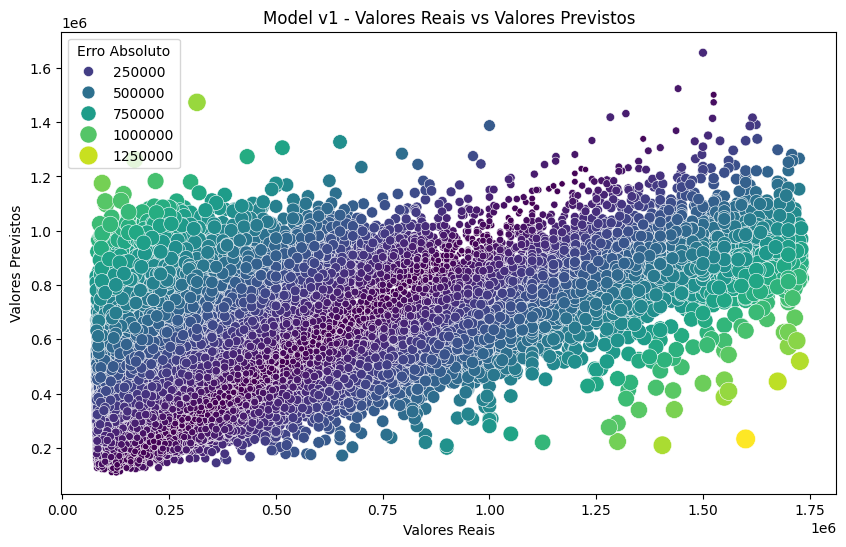

In [84]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Actual', y='Predicted', hue='Absolute Error', palette='viridis', size='Absolute Error', sizes=(20, 200))

plt.title('Model v1 - Valores Reais vs Valores Previstos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')

plt.legend(title='Erro Absoluto')
plt.show()

#### Curva do Gradiente

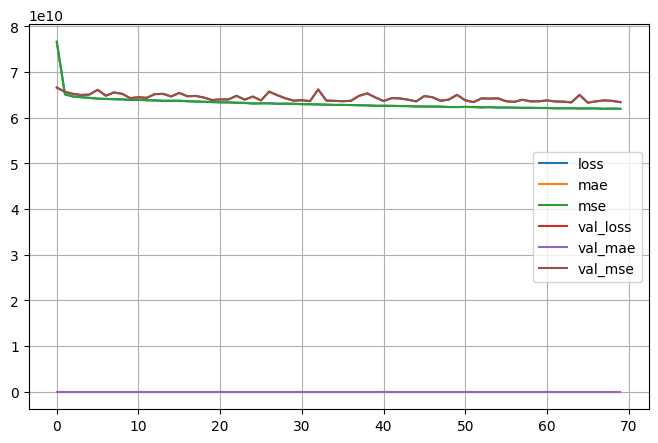

In [85]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

### Others

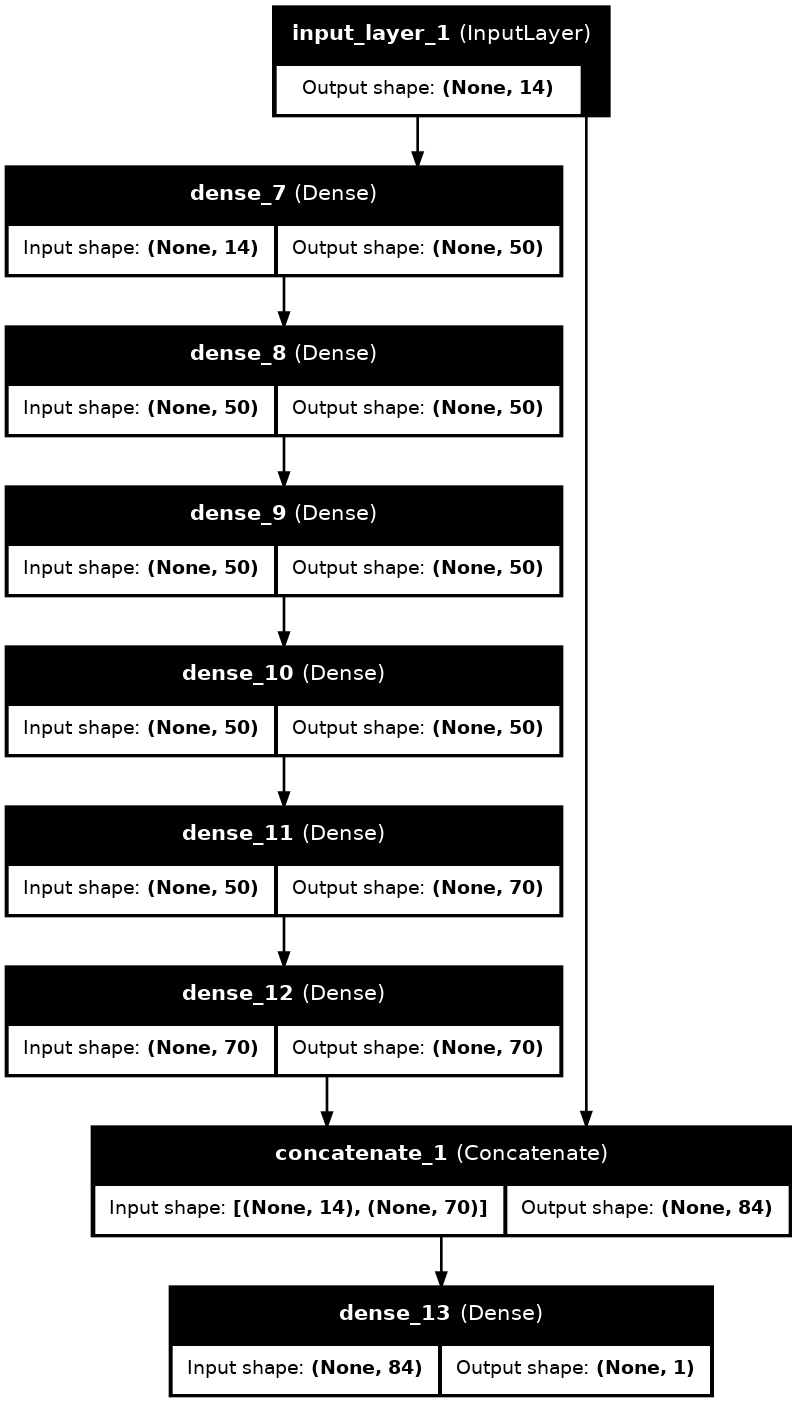

In [57]:
tf.keras.utils.plot_model(
    model,                                             
    to_file='nn.png',
    show_shapes=True,                                               # Formas dos tensores
    show_layer_names=True,                                          # Nomes das camadas
    expand_nested=False,                                            # Não expande camadas aninhadas
    dpi=96                                                          # Ajuste de Resolução
)